# import necessary library

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import precision_score,recall_score,f1_score

# Insert both train and test dataset

In [25]:
train_data =  pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")

# Explore data analysis

In [3]:
print(f"Train dataset shape:(rows ={train_data.shape[0]},columns={train_data.shape[1]})\nTest dataset shape:(rows={test_data.shape[0]},columns={test_data.shape[1]})")

Train dataset shape:(rows =1296675,columns=23)
Test dataset shape:(rows=555719,columns=23)


In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [23]:
train_data.isnull().sum()
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [26]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [28]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [29]:
train_data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

**# Data perperocess**

In [ ]:
#Remove irrelevent and redundence columns from both train and test datasets
col_to_drop = ["Unnamed: 0","cc_num","first","last","street","zip","job","dob","trans_num","unix_time"]
train_data.drop(col_to_drop,axis=1,inplace=True)
test_data.drop(col_to_drop,axis=1,inplace=True)

In [ ]:
#convert categorical into numerical by using categorical encode
# 1 use frequency encoder for both train data and test data
for col in ["city", "state"]:
    freq = train_data[col].value_counts(normalize=True)
    train_data[f"{col}_freq"] = train_data[col].map(freq)

for col in ["city", "state"]:
    freq = test_data[col].value_counts(normalize=True)
    test_data[f"{col}_freq"] = test_data[col].map(freq)

In [ ]:
# 2 traget encoder for both train and test data
# Mean fraud rate per category
merchant_target = train_data.groupby("merchant")["is_fraud"].mean()
category_target = train_data.groupby("category")["is_fraud"].mean()

train_data["merchant_te"] = train_data["merchant"].map(merchant_target)
train_data["category_te"] = train_data["category"].map(category_target)


merchant_target = test_data.groupby("merchant")["is_fraud"].mean()
category_target = test_data.groupby("category")["is_fraud"].mean()

test_data["merchant_te"] = test_data["merchant"].map(merchant_target)
test_data["category_te"] = test_data["category"].map(category_target)


In [ ]:
# 3 one hot encoder
train_data = pd.get_dummies(train_data, columns=["gender"], drop_first=True)

test_data = pd.get_dummies(test_data, columns=["gender"], drop_first=True)

In [ ]:
# Feature Engineering for trans_date_trans_time
# Convert to datetime for train
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

# New features
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day_of_week'] = train_data['trans_date_trans_time'].dt.dayofweek  # 0=Mon, 6=Sun
train_data['month'] = train_data['trans_date_trans_time'].dt.month


# Convert to datetime for test
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

# New features
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['day_of_week'] = test_data['trans_date_trans_time'].dt.dayofweek  # 0=Mon, 6=Sun
test_data['month'] = test_data['trans_date_trans_time'].dt.month

In [48]:
#drop the column already apply transformation
col_to_drop_after_trans = ["trans_date_trans_time","merchant","category","city","state"]
train_data.drop(col_to_drop_after_trans,axis=1,inplace=True)
test_data.drop(col_to_drop_after_trans,axis=1,inplace=True)

In [57]:
print(test_data.dtypes)

amt            float64
lat            float64
long           float64
city_pop         int64
merch_lat      float64
merch_long     float64
is_fraud         int64
city_freq      float64
state_freq     float64
merchant_te    float64
category_te    float64
gender_M          bool
hour             int32
day_of_week      int32
month            int32
dtype: object


In [ ]:
train_data['gender_M'] = train_data['gender_M'].astype(int)
test_data['gender_M'] = test_data['gender_M'].astype(int)

In [59]:
train_data.std() == 0

amt            False
lat            False
long           False
city_pop       False
merch_lat      False
merch_long     False
is_fraud       False
city_freq      False
state_freq     False
merchant_te    False
category_te    False
gender_M       False
hour           False
day_of_week    False
month          False
dtype: bool

<Axes: >

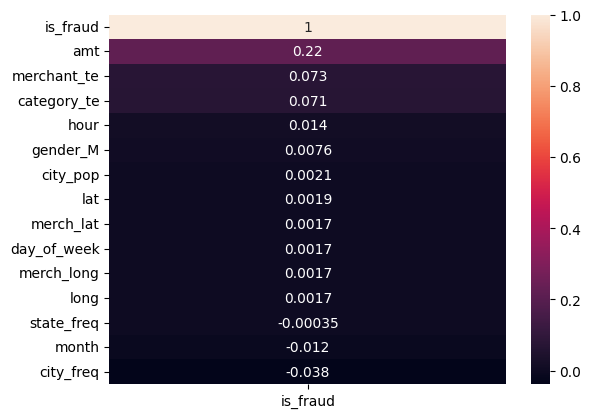

In [63]:
# Correlation matrix (focus on fraud correlation)
import seaborn as sns
corr = train_data.corr()
sns.heatmap(corr[['is_fraud']].sort_values('is_fraud', ascending=False), annot=True)

In [ ]:
#split into x and y both train and test data
x_train = train_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']

x_test = test_data.drop(columns=['is_fraud'],axis=1)
y_test = test_data['is_fraud']